# Matplotlib 한글폰트

### 1. 필요한 패키지를 가져옵니다.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# https://matplotlib.org/examples/api/unicode_minus.html
mpl.rcParams['axes.unicode_minus'] = False

### 2. 그래프를 그리기 위해 임의의 데이터를 만들어 줍니다.

In [8]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([-65, -78,  17, -68, -15,  63, 107, 148, 141, 220, 248, 314, 344,
       252, 226, 282, 218, 301, 370, 358, 422, 352, 392, 330, 261, 247,
       207, 136, 171, 229, 280, 262, 296, 304, 302, 358, 333, 343, 365,
       406, 458, 444, 457, 502, 410, 414, 487, 564, 531, 507], dtype=int32)

- 경고메시지 출력을 무시합니다.

In [9]:
import warnings
warnings.filterwarnings('ignore')

### 3. 기본 폰트로 지정되었기 때문에 한글이 깨져 나옵니다.

Text(0.5, 0, '시간(분)')

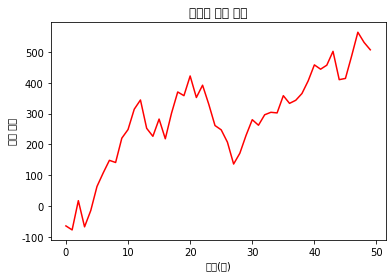

In [10]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

### 4. 폰트를 설정해 주기에 앞서 설치된 matplotlib 의 버전과 위치 정보를 가져옵니다.

In [11]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.0
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\ICT03_07\.matplotlib
캐시 위치:  C:\Users\ICT03_07\.matplotlib


In [12]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### 5. 설치된 폰트를 찍어 봅니다.

In [13]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

388


In [14]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

['C:\\Windows\\Fonts\\courbi.ttf',
 'C:\\Windows\\Fonts\\BOOKOSBI.TTF',
 'C:\\Windows\\Fonts\\HATTEN.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\Nirmala.ttf',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\ROCKI.TTF',
 'C:\\Windows\\Fonts\\YuGothB.ttc',
 'C:\\Windows\\Fonts\\GLECB.TTF']

In [15]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

388


['STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmex10',
 'cmsy10',
 'DejaVu Serif']

### 6. 나눔 고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.

- 설치후 캐시 파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

In [16]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

### 8. 폰트를 사용하는 방법

- FontProperties 를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해 주어야 합니다.

- matplotlib.rcParams[]으로 전역 글꼴 설정 방법 - 그래프에 설정을 해주면 폰트가 필요한 항목에 적용됩니다.

- 2)번의 방법을 mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 적어주는 방법, 단 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해 주지 않아도 되서 편리합니다.

1) FontProperties 를 사용하는 방법
텍스트를 지정하는 항목에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용 됩니다.

- matplotlib.pyplot
    - title() 
    - xlabel()
    - ylabel()
    - legend()
    - text()    
- matplotlib.axes
    - set_title()

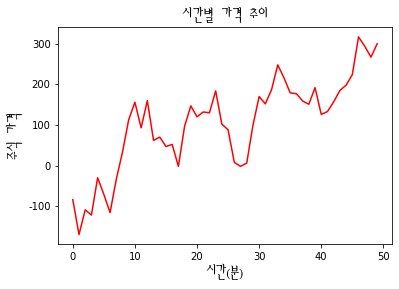

In [12]:
# fname 옵션을 사용하는 방법

path = 'C:\\WINDOWS\\Fonts\\HMKMAMI.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

2) matplotlib.rcParams[]으로 전역 글꼴 설정 방법

In [16]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothicCoding']


In [17]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [13]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.


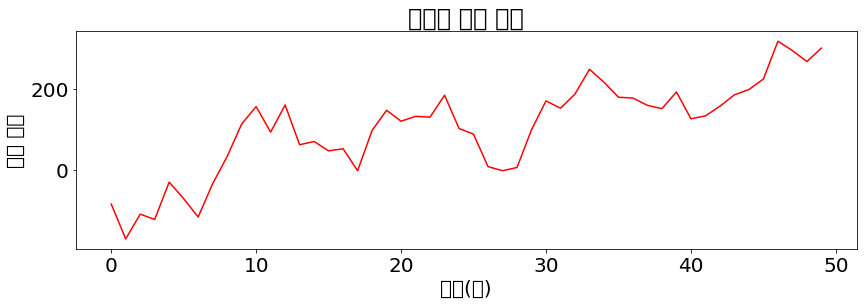

In [14]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

rcParams 대신 FontProperties 와 plt.rc 를 사용하는 방법

Ami R


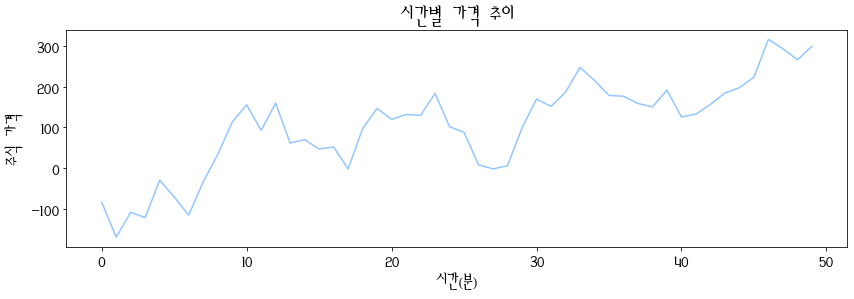

In [15]:
path =  'C:\\WINDOWS\\Fonts\\HMKMAMI.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

3) rcParams 를 설정 파일에 직접 적어주는 방법 - 모든 노트북에 공통 적용

- font.family : NanumGothicOTF
- 이 외에 자주 사용하는 설정도 함께 해주면 편리합니다.
- 이곳에 폰트를 지정해 주면 노트북을 실행할 때 바로 로드되도록 설정할 수 있습니다.

- 설정파일 위치 확인

In [21]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\Users\seonjo\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


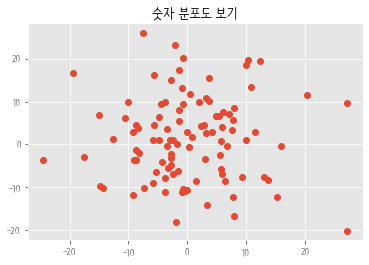

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()

https://matplotlib.org/tutorials/introductory/customizing.html